## Project 8 - Jeffery Boczkaja

## Importing training data and testing it

In [1]:
import pandas as pd

titanic_train = pd.read_csv("titanic-train.csv")

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Modifying data for use

In [4]:
titanic_train = titanic_train.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])

In [5]:
titanic_train['Sex'] = titanic_train['Sex'].map({'male': 1, 'female': 0})

In [6]:
most_frequent_embarked = titanic_train['Embarked'].mode()[0]
embarked_mapping = {"S": 0, "C": 1, "Q": 2}
titanic_train['Embarked'].fillna(most_frequent_embarked, inplace=True)
titanic_train['Embarked'] = titanic_train['Embarked'].map(embarked_mapping)

In [7]:
titanic_train['Age'].fillna(titanic_train['Age'].median(), inplace=True)

In [8]:
titanic_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,0
1,1,1,0,38.0,1,0,71.2833,1
2,1,3,0,26.0,0,0,7.9250,0
3,1,1,0,35.0,1,0,53.1000,0
4,0,3,1,35.0,0,0,8.0500,0


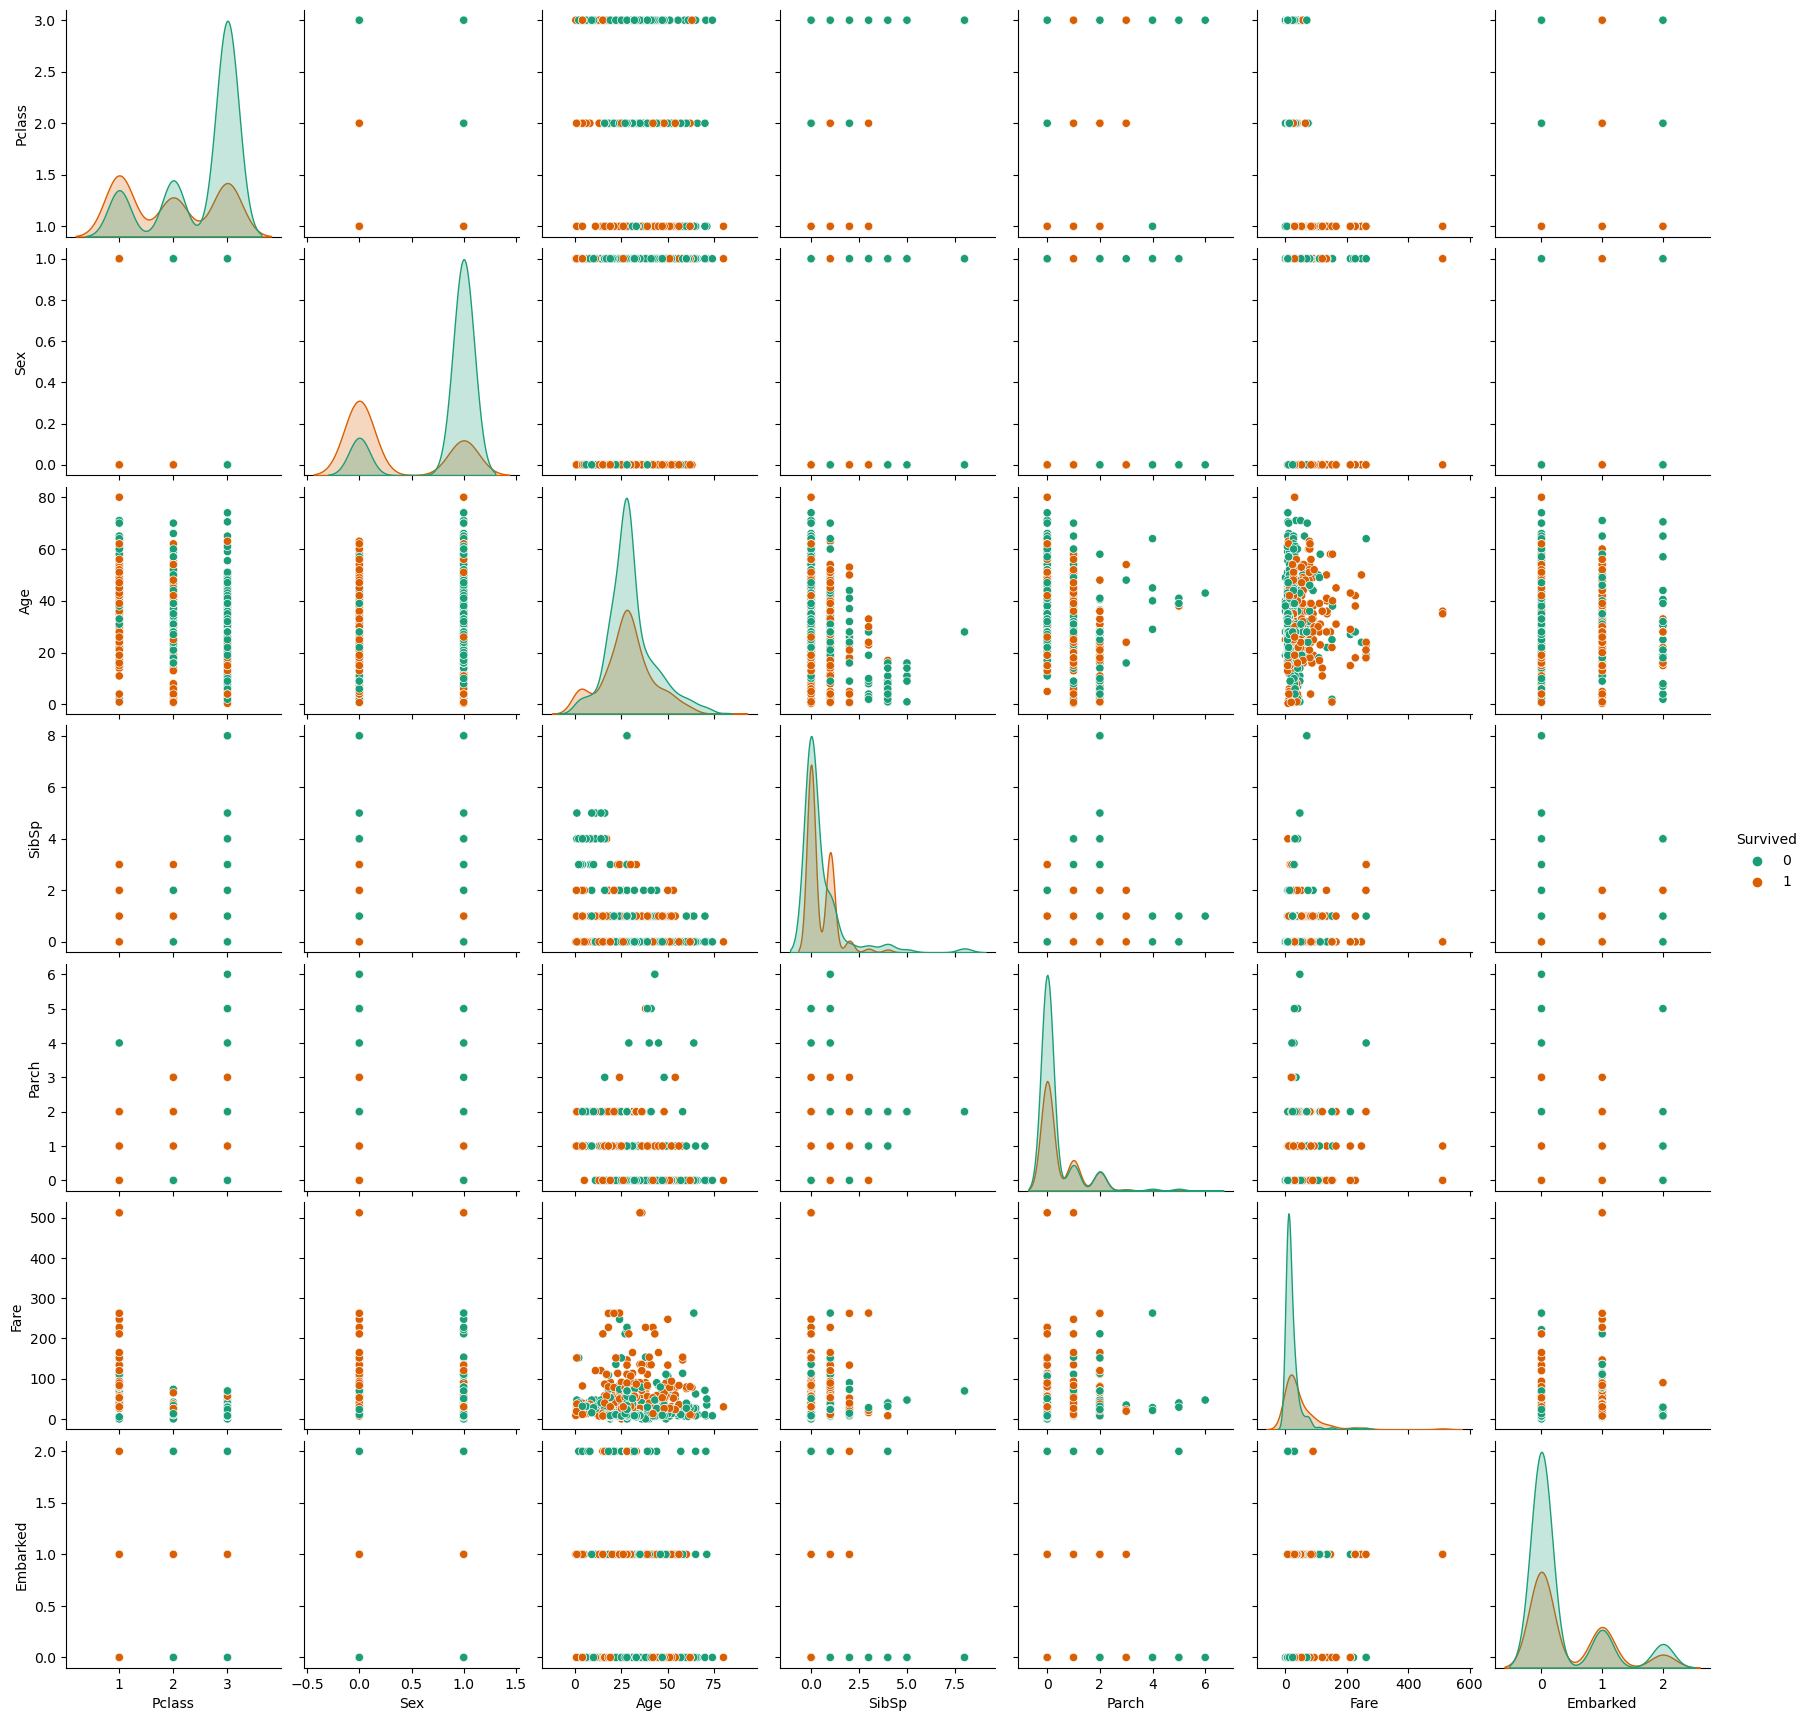

In [9]:
sns.pairplot(titanic_train,hue='Survived',palette='Dark2')

## Bringing in test data

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
titanic_test = pd.read_csv("titanic-test.csv")

In [12]:
titanic_test = titanic_test.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])

In [13]:
titanic_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


## Modifying test data

In [14]:
titanic_test['Sex'] = titanic_test['Sex'].map({'male': 1, 'female': 0})

In [15]:
titanic_test['Age'].fillna(titanic_test['Age'].median(), inplace=True)
titanic_test['Fare'].fillna(titanic_test['Fare'].median(), inplace=True)

In [16]:
most_frequent_embarked = titanic_test['Embarked'].mode()[0]
titanic_test['Embarked'].fillna(most_frequent_embarked, inplace=True)
embarked_mapping = {"S": 0, "C": 1, "Q": 2}
titanic_test['Embarked'] = titanic_test['Embarked'].map(embarked_mapping)

In [17]:
titanic_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,2
1,3,0,47.0,1,0,7.0000,0
2,2,1,62.0,0,0,9.6875,2
3,3,1,27.0,0,0,8.6625,0
4,3,0,22.0,1,1,12.2875,0


## Creating and testing SVC

In [18]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [19]:
X_train = titanic_train[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y_train = titanic_train['Survived']
X_test = titanic_test[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]

In [20]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
svc_model = SVC()
svc_model.fit(X_train_scaled, y_train)

SVC()

In [22]:
predictions = svc_model.predict(X_test)

C:\Users\whitl\anaconda3\Conda\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


# Training Accuracy!!

In [23]:
train_predictions = svc_model.predict(X_train_scaled)
train_accuracy = accuracy_score(y_train, train_predictions)

train_accuracy

0.8451178451178452

## Using only training set to create model for confusion matrix and classification report
### This would be a less accurate model than we already created

In [24]:
X = titanic_train.drop('Survived',axis=1)
y = titanic_train['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [25]:
svc_model = SVC()

In [26]:
svc_model.fit(X_train,y_train)

SVC()

In [27]:
predictions = svc_model.predict(X_test)

In [28]:
from sklearn.metrics import classification_report,confusion_matrix

In [29]:
print(confusion_matrix(y_test,predictions))

[[155  12]
 [ 77  24]]


In [30]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.67      0.93      0.78       167
           1       0.67      0.24      0.35       101

    accuracy                           0.67       268
   macro avg       0.67      0.58      0.56       268
weighted avg       0.67      0.67      0.62       268



# PCA portion

In [31]:
titanic_train = pd.read_csv("titanic-train.csv")
titanic_test = pd.read_csv("titanic-test.csv")

In [32]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [33]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_train_scaled)

PCA()

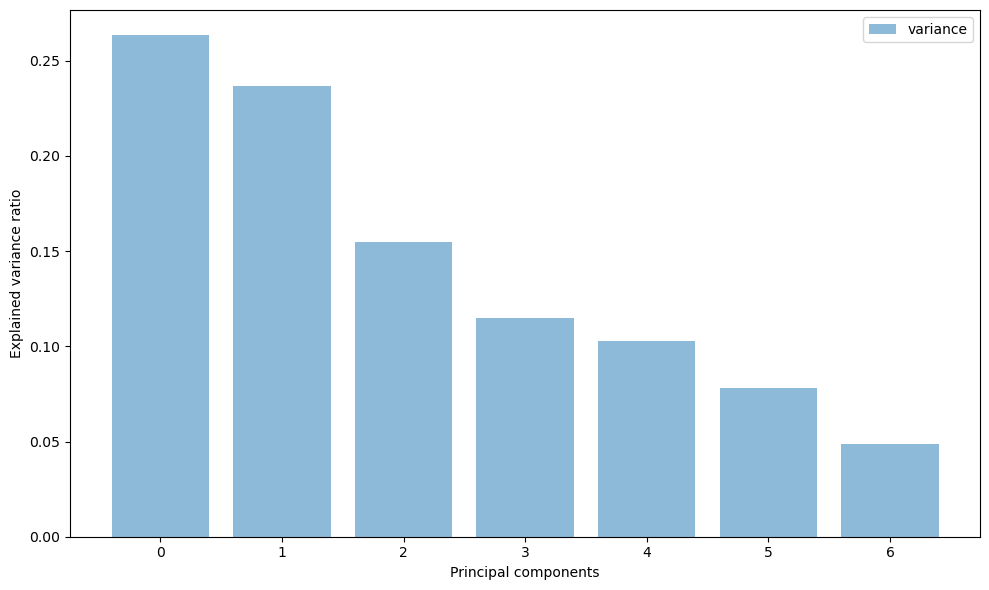

In [34]:
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)

pca = PCA()
pca.fit(X_train_standardized)

explained_variances = pca.explained_variance_ratio_

plt.figure(figsize=(10,6))
plt.bar(range(len(explained_variances)), explained_variances, alpha=0.5, align='center', label='variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [35]:
pca = PCA(n_components=3)
X_train_pca_transformed = pca.fit_transform(X_train_scaled)

In [36]:
from sklearn.model_selection import train_test_split
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
X_train_pca_transformed = pca.transform(X_train_split)
X_val_pca_transformed = pca.transform(X_val_split)

C:\Users\whitl\anaconda3\Conda\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(
C:\Users\whitl\anaconda3\Conda\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


## Accuracy of PCA

In [37]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

svc_pca = SVC()
svc_pca.fit(X_train_pca_transformed, y_train_split)
y_val_pred_pca = svc_pca.predict(X_val_pca_transformed)
accuracy_pca = accuracy_score(y_val_split, y_val_pred_pca)
conf_matrix_pca = confusion_matrix(y_val_split, y_val_pred_pca)

accuracy_pca

0.68

In [38]:
conf_matrix_pca

array([[66, 12],
       [28, 19]], dtype=int64)